In [1]:
from IPython.display import Image


# CAMBRIDGE VS OXFORD REPOSITORY SHOWDOWN
### From Petr Knoth, Matteo Cancellieri, Drahomira Herrmannova 
#### KMI, The Open University, United Kingdom
#### Any questions? Tweet it to @oacore and with the hashtag #OR16Dev

# Analyse the eternal british universities rivalry through CORE, Mendeley and Microsoft Academic Graph

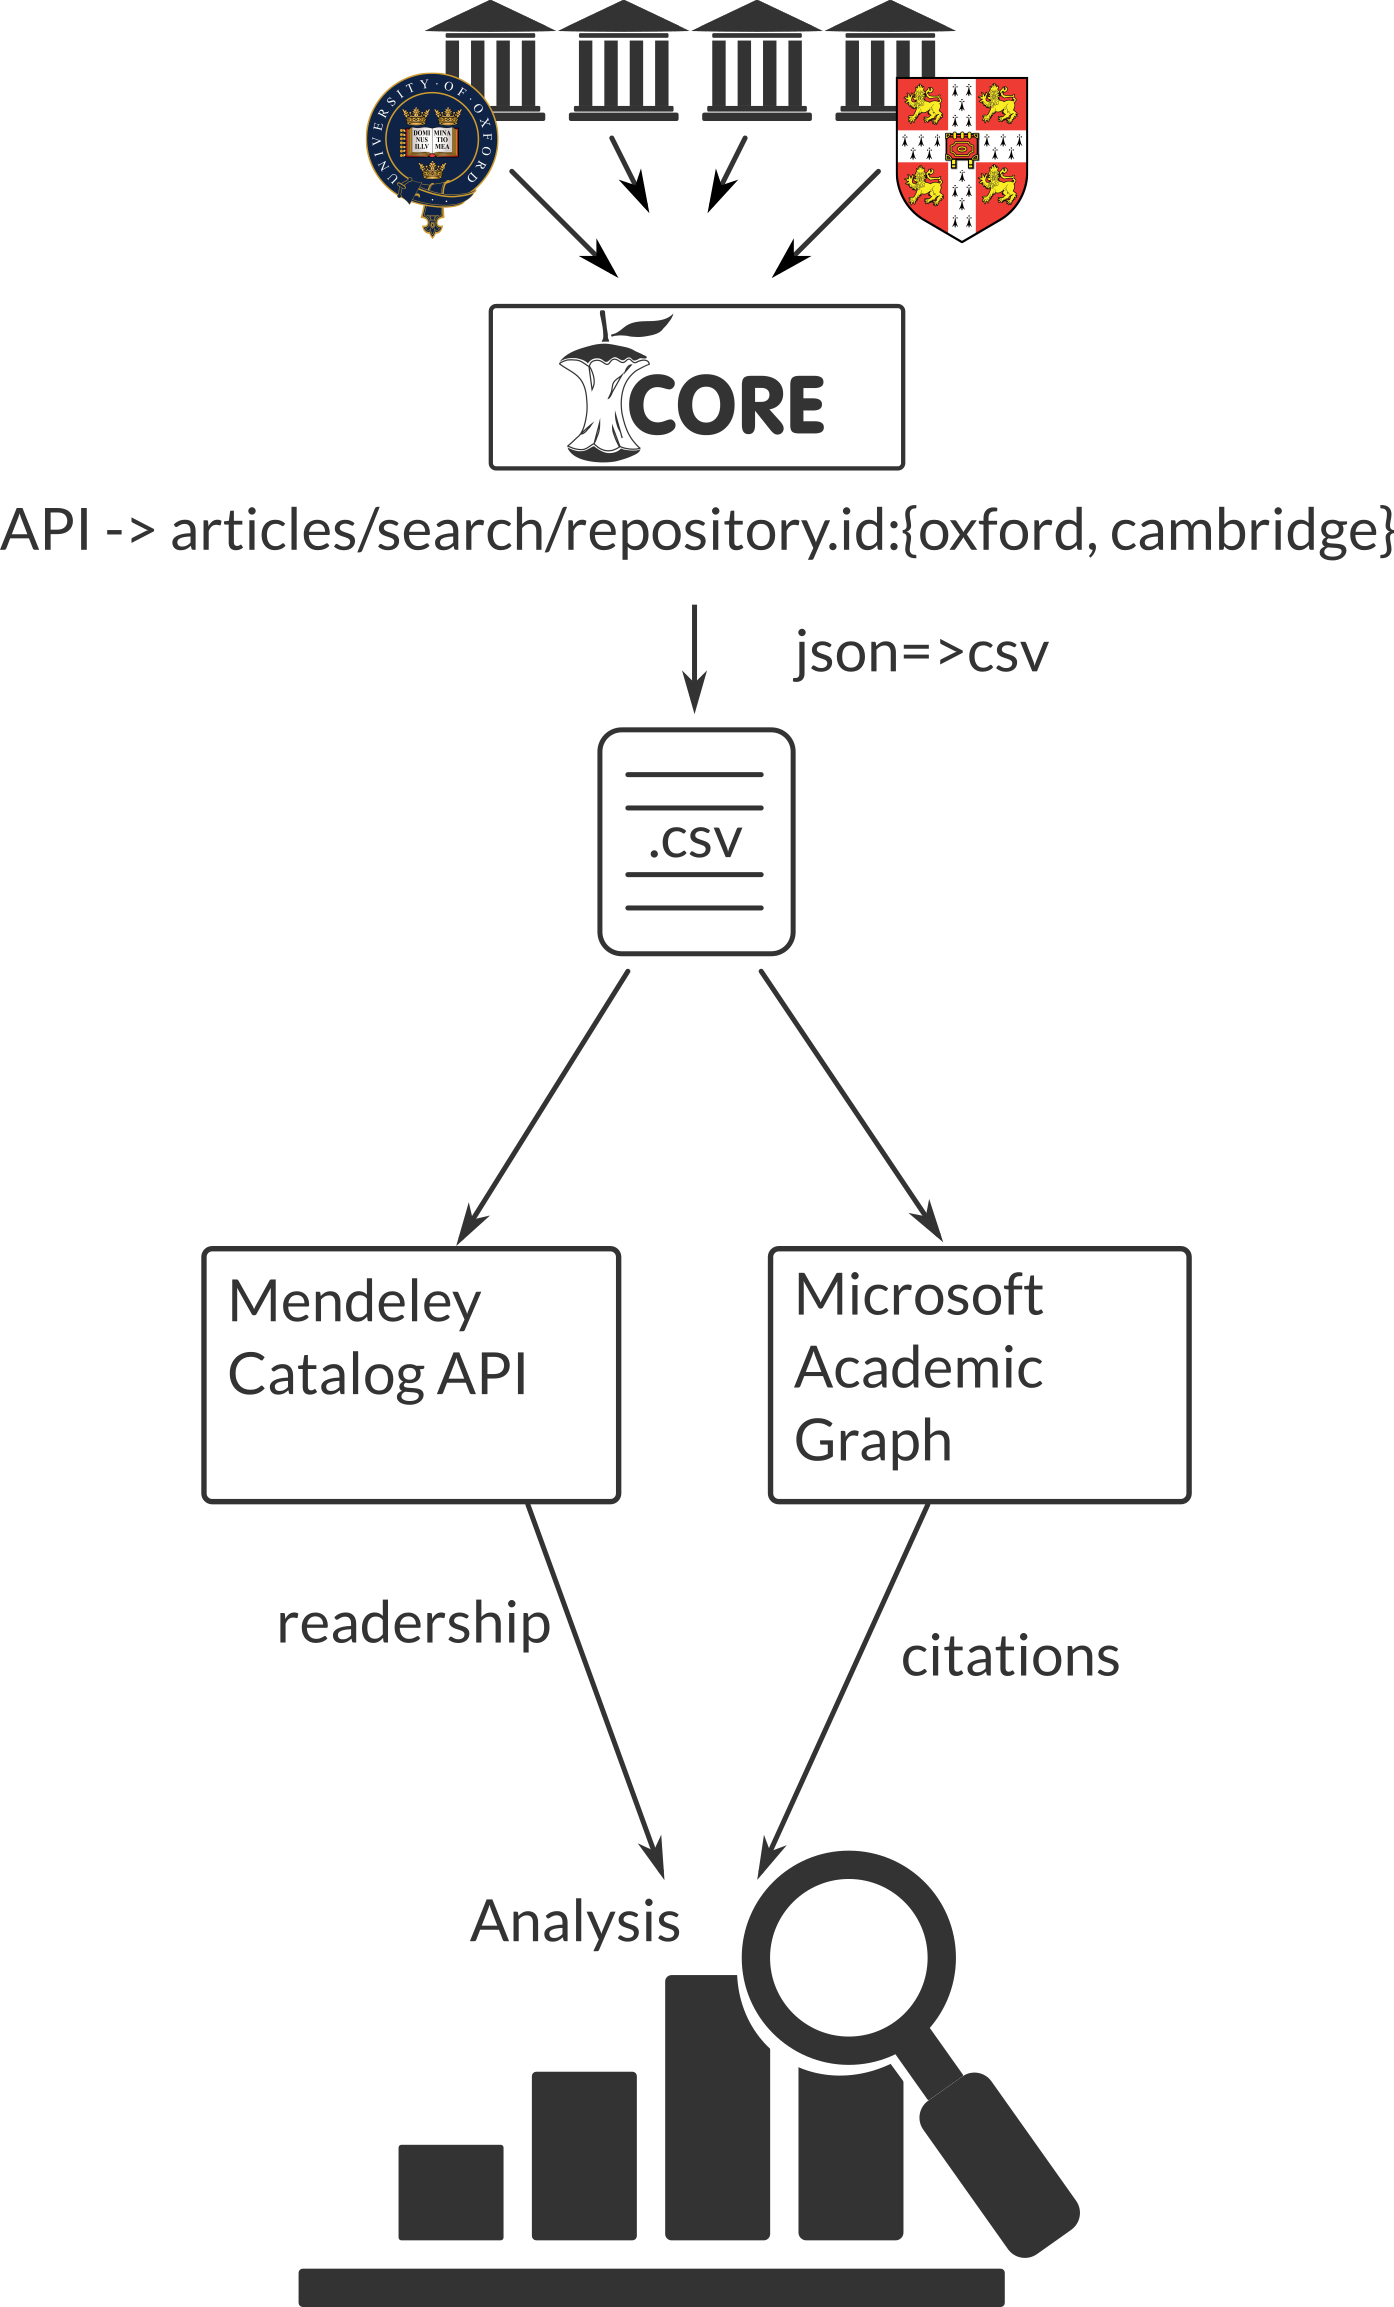

In [2]:
Image(filename='resources/workflow.png', width=400)

## Import the needed libraries

In [3]:
import sys
import pandas
sys.path.append('src/cambridge-oxford')
import mreadership
from core import CoreApiRequestor
import matplotlib.pyplot as plt
import numpy as np
import json
from mendeley import Mendeley
from mendeley.exception import MendeleyException
import yaml
import pprint
pp = pprint.PrettyPrinter(indent=4)
import json

## Call the CORE API to retrieve all articles for a given repository

In [4]:
page = 1
oxford_repository_id = 88 
r_oxford = CoreApiRequestor(oxford_repository_id, '#api_key_here')
cambridge_repository_id = 27 
r_cambridge = CoreApiRequestor(cambridge_repository_id, '#api_key_here')
url = r_oxford.get_request_url(page)
url

'http://core.ac.uk/api-v2/articles/search/repositories.id:88?apiKey=#api_key_here&page=1&pageSize=10'

#### This is how the CORE data look like

In [5]:
result = r_oxford.get_docs_from_core(1)
pp.pprint(json.loads(result.decode('utf-8')))

{   'data': [   {   'authors': [   'Bolíbar, B',
                                   'Fina Avilés, F',
                                   'Morros, R',
                                   'Garcia-Gil, MM',
                                   'Hermosilla, E',
                                   'Ramos, R',
                                   'Rosell, M',
                                   'Rodríguez, J',
                                   'Medina, M',
                                   'Calero, S',
                                   'Prieto-Alhambra, D'],
                    'contributors': [],
                    'datePublished': '2012-5',
                    'doi': '10.1016/j.medcli.2012.01.020',
                    'id': 29697184,
                    'identifiers': [   'oai:ora.ox.ac.uk:uuid:635bca18-bd23-41ed-b3fc-0f77c963f89d',
                                       '10.1016/j.medcli.2012.01.020'],
                    'journals': [   {   'identifiers': [   'issn:0025-7753',
             

#### We then run this through all the available documents (pages) in CORE and generate a CSV file projecting only a few fields that are of interest to us.

#### This are the records we get from the CSV for each repository

In [6]:
oxford = pandas.read_csv('exports/oxford_export0616.csv',sep=',')
cambridge = pandas.read_csv('exports/cambridge_export0616.csv',sep=',')
print ("Oxford total records: %d Cambridge total records: %d" % (oxford.Title.count(), cambridge.Title.count()))

Oxford total records: 248865 Cambridge total records: 193249


#### ... and these are the fields we have projected. 

In [7]:
oxford

,Title,OAI,Authors,Full Text,Harvest date,DOI
0,Effect of telecare on use of health and social...,oai:ora.ox.ac.uk:uuid:e6682867-7dbd-4856-b51a-...,"A Steventon, M Bardsley, J Billings, J Dixon, ...",No,2015-09-30T15:52:23Z,NaN
1,A high frequency African coding polymorphism i...,oai:ora.ox.ac.uk:uuid:e66a59a1-1480-4eb7-8a5d-...,"D Fernandez-Reyes, AG Craig, SA Kyes, N Peshu,...",No,2015-09-30T15:52:25Z,NaN
2,DO WE REALLY NEED DARK MATTER,oai:ora.ox.ac.uk:uuid:e66d6496-bcff-4387-9bf8-...,J BINNEY,No,2015-09-30T15:52:26Z,NaN
3,Adaption and responses: Myocardial innervation...,oai:ora.ox.ac.uk:uuid:e67bafb3-2102-4563-b643-...,N Herring and DJ Paterson,No,2015-09-30T15:52:35Z,NaN
4,Financial Reform in Eastern Europe: Progress W...,oai:ora.ox.ac.uk:uuid:e6446c7b-f67e-4058-ba90-...,Jennifer Corbett and Colin Mayer,No,2015-09-30T15:52:04Z,NaN
5,GROMMET: An N-body code for high-resolution si...,oai:ora.ox.ac.uk:uuid:e6479c0e-6674-4c27-ae09-...,J Magorrian,No,2015-09-30T15:52:05Z,NaN
6,An in vitro micro-volume procedure for rapid m...,oai:ora.ox.ac.uk:uuid:e64a057d-1936-42ff-9aa3-...,"JK Baird, JE Decker-Jackson and DE Davidson",No,2015-09-30T15:52:07Z,NaN
7,GATA1-mutant clones are frequent and often uns...,oai:ora.ox.ac.uk:uuid:e65d5fdd-bc71-48a3-a4b7-...,"I Roberts, K Alford, G Hall, G Juban, H Richmo...",No,2015-09-30T15:52:18Z,NaN
8,Body mass index and risk of liver cirrhosis in...,oai:ora.ox.ac.uk:uuid:e65f5304-37db-49b7-a530-...,"B Liu, A Balkwill, G Reeves and V Beral",No,2015-09-30T15:52:20Z,NaN
9,Semiconductor tracker final integration and co...,oai:ora.ox.ac.uk:uuid:e62b593f-8808-4c98-9d12-...,A Robichaud-Veronneau and ATLASSCT Collaboration,No,2015-09-30T15:51:46Z,NaN


#### Calling Mendeley API to get readearship values based on the DOIs

```python
def get_readership(mendeley, dataset):
    #...
    doc = mendeley.catalog.by_identifier(doi=value['DOI'], view="stats")
    total_readers.append(doc.reader_count)
    total_readers_by_country.append(doc.reader_count_by_country)
    years.append(doc.year)
    dois.append(np.nan)
    #...

with open('config.yml') as f:
    config = yaml.load(f)
mendeley_object = Mendeley(config['clientId'], config['clientSecret'])
auth = mendeley_object.start_client_credentials_flow()
mendeley = auth.authenticate()

total_readers, total_readers_by_country, years = get_readership(mendeley, oxford) # doc = mendeley.catalog.by_identifier(doi=value['doi'], view="stats")
oxford['year'] = years
oxford['total_readers'] = total_readers
oxford.to_csv('oxford-readerships.csv')

total_readers, total_readers_by_country, years = self.get_readership(mendeley, cambridge) 
cambridge['year'] = years
cambridge['total_readers'] = total_readers
cambridge.to_csv('cambridge-readerships.csv')
```

#### This is how you can get the 5 top article based on readership

In [5]:
oxford_readership = pandas.read_csv('results/oxford-readerships.csv',sep=',')
cambridge_readership = pandas.read_csv('results/cambridge-readerships.csv',sep=',')
ox_top_5 = oxford_readership.sort_values(by='total_readers', ascending=False).drop_duplicates(['DOI'], keep='last').head(5)
ox_top_5[["Title", "DOI", "year", "total_readers"]]

,Title,DOI,year,total_readers
196360,Five Misunderstandings About Case-Study Research,10.1177/1077800405284363,2006.0,5344.0
32534,Preferred reporting items for systematic revie...,10.1371/journal.pmed.1000097,2009.0,3245.0
39592,Food security: the challenge of feeding 9 bill...,10.1126/science.1185383,2010.0,2942.0
9158,Power failure: Why small sample size undermine...,10.1038/nrn3475,2013.0,2637.0
3572,Finding the missing heritability of complex di...,10.1038/nature08494,2009.0,2526.0


#### Get the average readers per year from 2000 to 2016

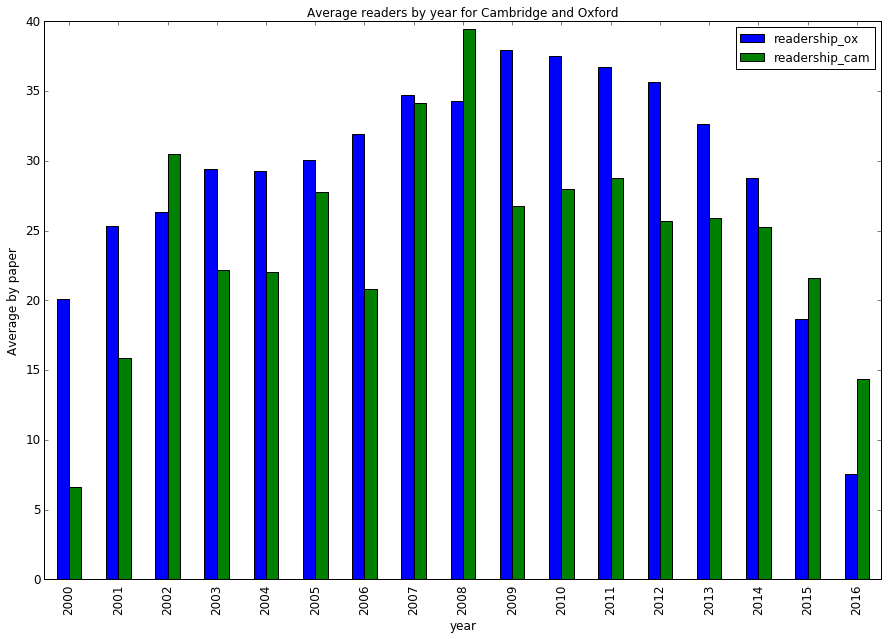

In [6]:
cambridge_readership_latest = cambridge_readership[(cambridge_readership.year >= 2000) & (cambridge_readership.year <= 2016)]
cam_group_m = cambridge_readership_latest.groupby(['year'])
cam_readership_m_mean = cam_group_m.aggregate(np.mean)
cam_readership_m_mean.reset_index(level=0, inplace=True)
cam_readership_m_mean_year=cam_readership_m_mean[['year','total_readers']]

oxford_readership_latest = oxford_readership[(oxford_readership.year >= 2000) & (oxford_readership.year <= 2016)]
ox_group_m = oxford_readership_latest.groupby(['year'])
ox_readership_m_mean = ox_group_m.aggregate(np.mean)
ox_readership_m_mean.reset_index(level=0, inplace=True)
ox_readership_m_mean_year=ox_readership_m_mean[['year','total_readers']]

oxcam_readership = cam_readership_m_mean_year.merge(ox_readership_m_mean_year, on="year")
oxcam_readership.columns = ["year","readership_cam", "readership_ox"]
oxcam_readership.year = oxcam_readership.year.astype(int)

%matplotlib inline
ax = oxcam_readership[['readership_ox','readership_cam']].plot(kind='bar', title ="Average readers by year for Cambridge and Oxford",figsize=(15,10),legend=True, fontsize=12)
cnt = len(oxcam_readership)
x_axis = np.arange(cnt)
ax.set_xlabel("year",fontsize=12)
plt.xticks(x_axis,oxcam_readership['year'],  )
ax.set_ylabel("Average by paper",fontsize=12)
plt.show()


### How about the citations?

#### We load the MAG citation network as a sparse matrix

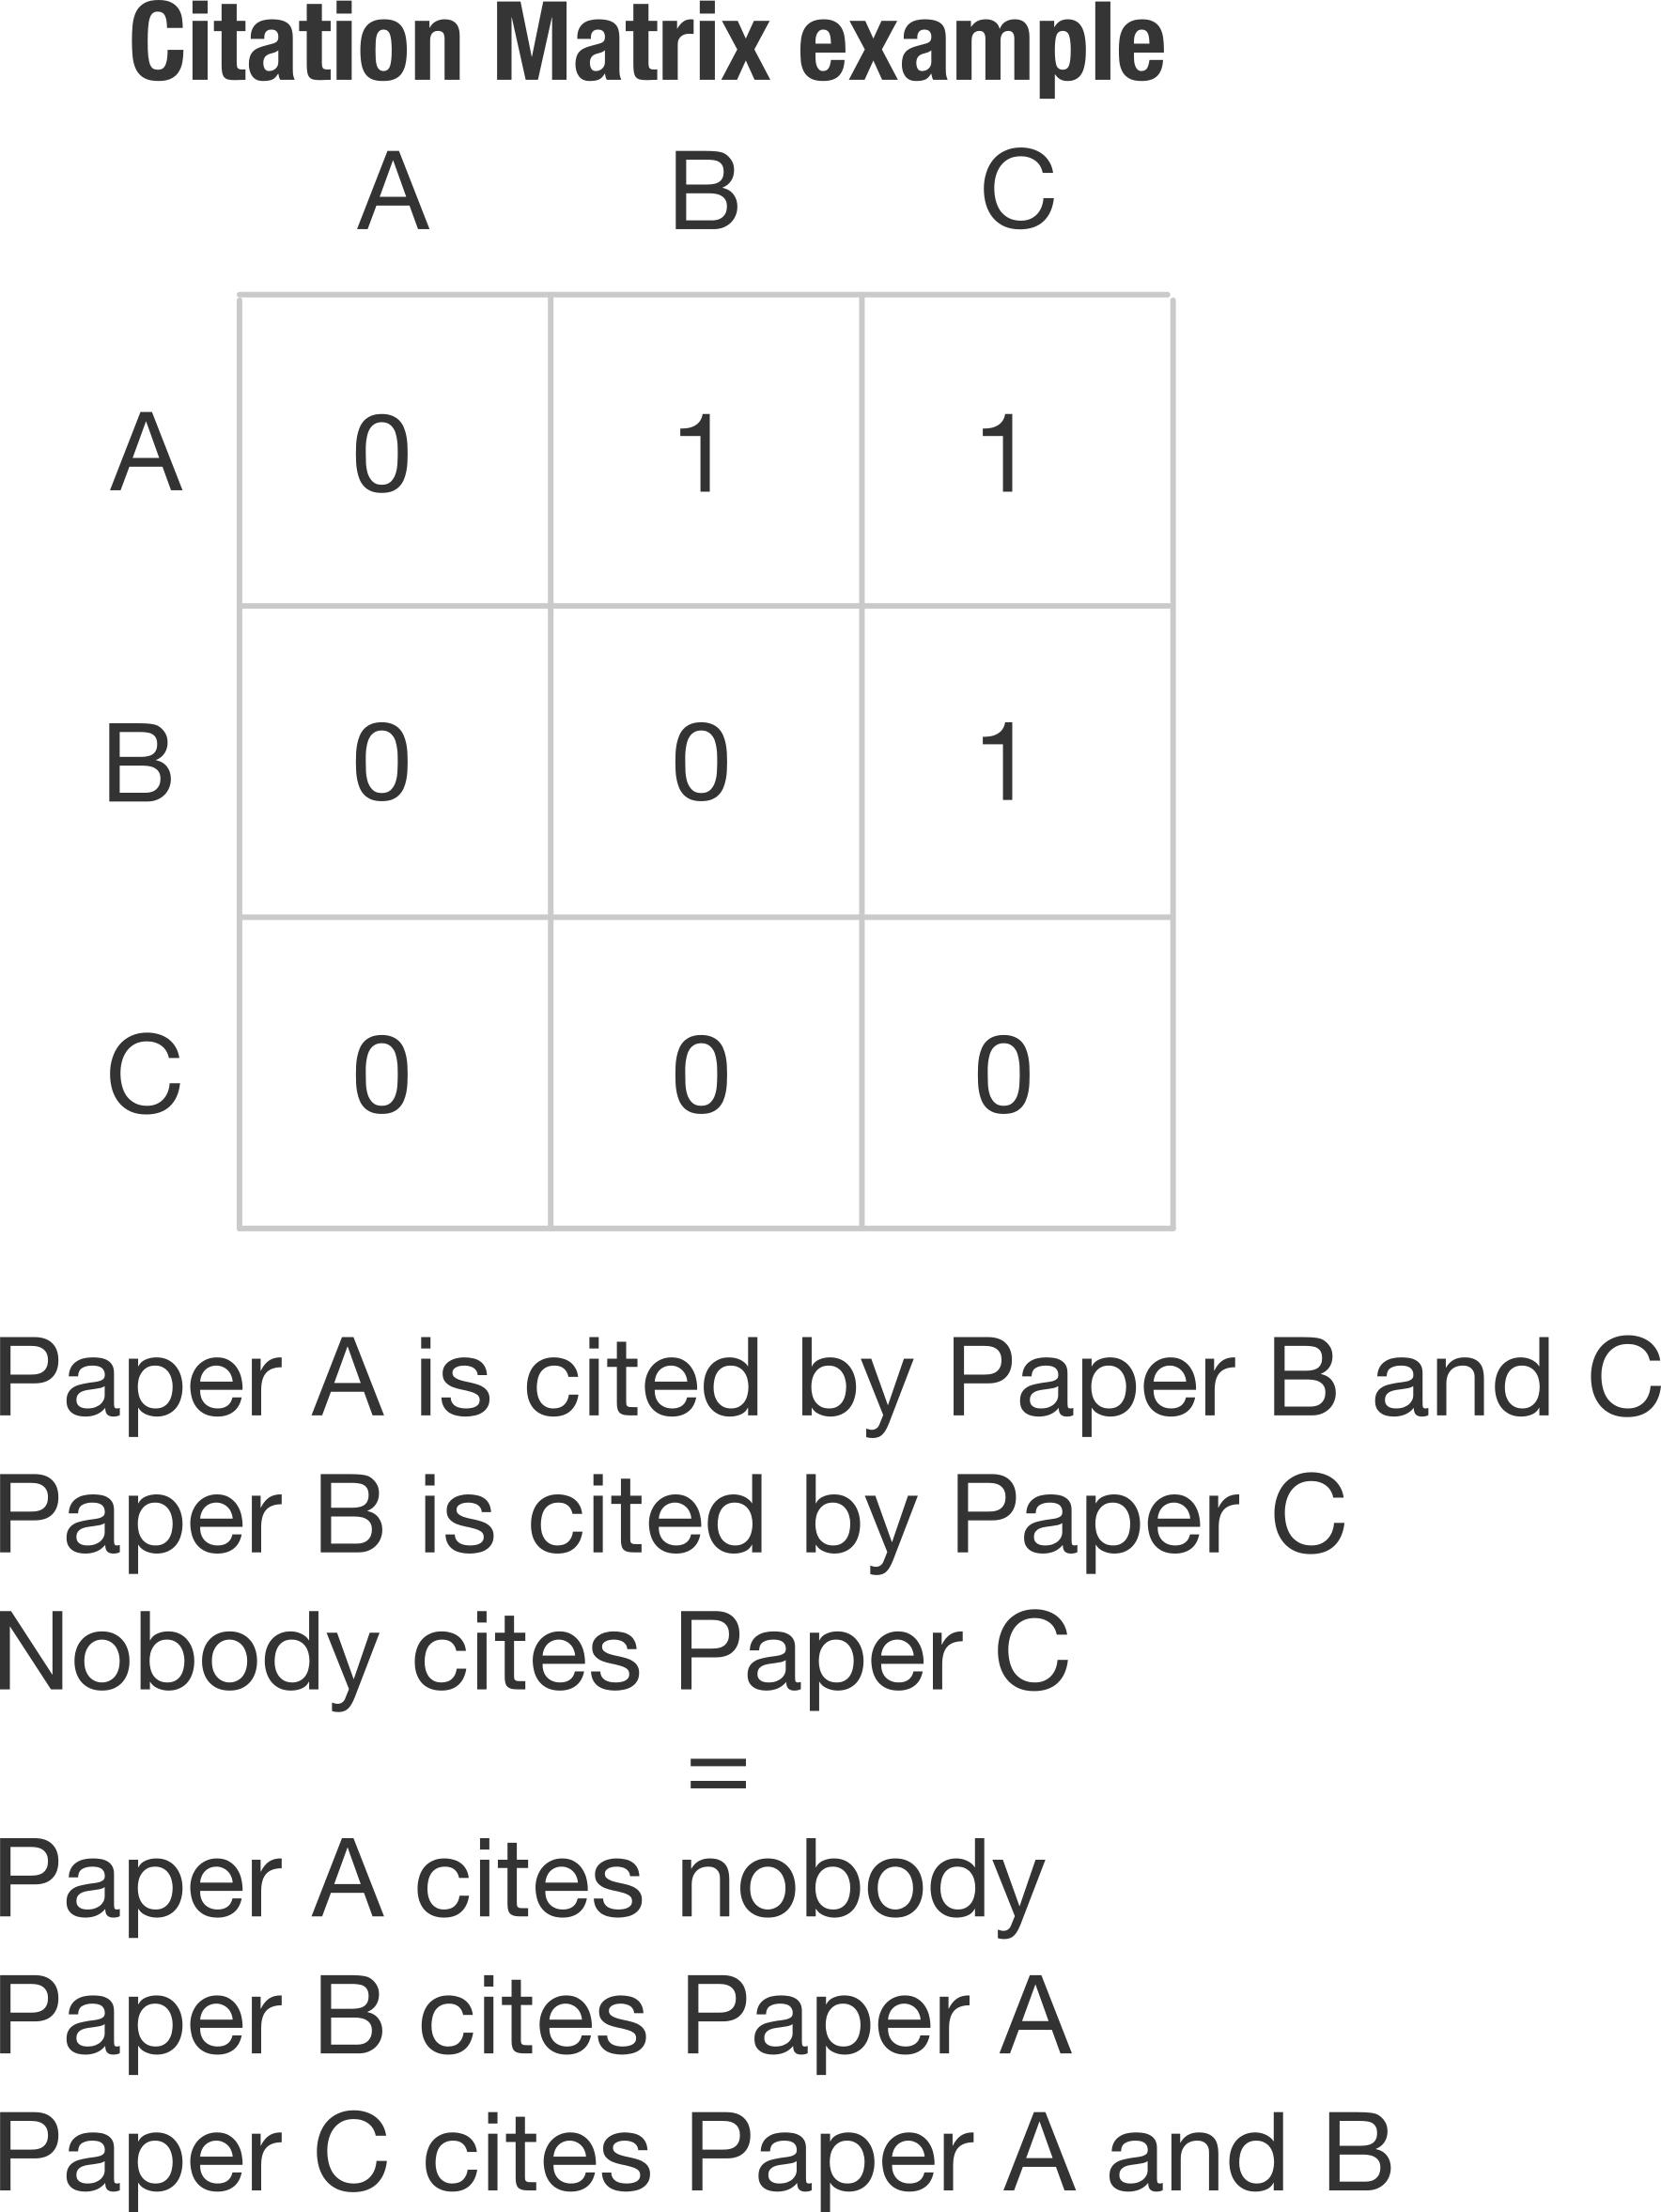

In [7]:
Image(filename='resources/affmatrix.png', width=400) 

```python

def load_citation_matrix(self):
    """
    :return: scipy.sparse.csr_matrix
    """
    ds = Hdf5Datastore()
    self.logger.info('Loading citation matrix from %s',
                     ds.get_datastore_path())
    adj_matrix = ds.load_sparse_matrix('citation_matrix')
    self.logger.info('Loading done!')
    return adj_matrix


def store_citation_matrix(self, cit_matrix):
    """
    :param cit_matrix: scipy.sparse.csr_matrix
    :return: None
    """
    ds = Hdf5Datastore()
    self.logger.info('Storing citation matrix in %s',
                     ds.get_datastore_path())
    ds.store_sparse_matrix(cit_matrix, 'citation_matrix')
    self.logger.info('Storing done!')

papers["ref"]=np.array(matrix.sum(axis=1))   
papers['citedBy']=np.transpose(np.array(matrix.sum(axis=0)))
```


#### We queried the matrix for all the papers and sorted by citation counts

In [8]:
#read the csv from oxford with the data merge
cambridge_merge=pandas.read_csv('mag/cambridge_merge_mag.tsv',sep='\t')
oxford_merge=pandas.read_csv('mag/oxford_merge_mag.tsv',sep='\t')
oxford_merge.sort_values(by="citedBy", ascending=False)[["Title", "DOI", "publish_year", "citedBy"]]

,Title,DOI,publish_year,citedBy
53017,Measuring inconsistency in meta-analyses.,10.1136/bmj.327.7414.557,2003,9698
57302,Intensive blood-glucose control with sulphonyl...,10.1016/S0140-6736(98)07019-6,1998,7121
60279,Preferred reporting items for systematic revie...,10.1371/journal.pmed.1000097,2009,5168
24059,A new statistical method for haplotype reconst...,10.1086/319501,2001,4489
48772,New diagnostic criteria for multiple sclerosis...,10.1002/ana.410130302,1983,4021
22033,Place navigation impaired in rats with hippoca...,10.1038/297681a0,1982,3612
47133,A NOVEL GENE CONTAINING A TRINUCLEOTIDE REPEAT...,10.1016/0092-8674(93)90585-E,1993,3559
27564,Advances in functional and structural MR image...,10.1016/j.neuroimage.2004.07.051,2004,3444
72213,Fast robust automated brain extraction.,10.1002/hbm.10062,2002,3298
59156,Association of glycaemia with macrovascular an...,10.1136/bmj.321.7258.405,2000,3052


#### The citations have a very long tail in general, as expected ...
#### ... we don't want to take into account papers with 0 citations to produce averages for Camrbidge/Oxford comparison, as 0 could also mean no data. So we remove the long tail ...

In [9]:
#delete citation 0 on both table
oxford_merge = oxford_merge.loc[oxford_merge['citedBy']!=0]
cambridge_merge = cambridge_merge.loc[cambridge_merge['citedBy']!=0]

#### ...and we merge the results in a single table

In [10]:
cambrige_with_doi_filter = cambridge_merge[(cambridge_merge.publish_year > 2000) & (cambridge_merge.publish_year < 2016)]
cambridge_group = cambrige_with_doi_filter.groupby(['publish_year'])
cambridge_citation_mean = cambridge_group.aggregate(np.mean)
cambridge_citation_mean.reset_index(level=0, inplace=True)
cambridge_citation_mean_by_year=cambridge_citation_mean[['publish_year','ref','citedBy']]
cambridge_citation_mean_by_year

oxford_with_doi_filter = oxford_merge[(oxford_merge.publish_year > 2000) & (oxford_merge.publish_year < 2016)]
oxford_group = oxford_with_doi_filter.groupby(['publish_year'])
oxford_citation_mean = oxford_group.aggregate(np.mean)
oxford_citation_mean.reset_index(level=0, inplace=True)
oxford_citation_mean_by_year=oxford_citation_mean[['publish_year','ref','citedBy']]
oxford_citation_mean_by_year

ox_copy=oxford_citation_mean_by_year.copy()
ox_copy.rename(columns={'citedBy': 'oxford_citation'}, inplace=True)
cam_copy=cambridge_citation_mean_by_year.copy()
cam_copy.rename(columns={'citedBy': 'cambridge_citation'}, inplace=True)
cam_copy=cam_copy[['publish_year','cambridge_citation']]
ox_copy=ox_copy[['publish_year','oxford_citation']]
oxbridge=pandas.merge(ox_copy,cam_copy,how='left',on='publish_year')
oxbridge = oxbridge[['publish_year','cambridge_citation', 'oxford_citation']]
oxbridge


,publish_year,cambridge_citation,oxford_citation
0,2001,121.400000,44.835334
1,2002,357.833333,46.096226
2,2003,67.500000,54.195415
3,2004,58.115385,46.422710
4,2005,66.100000,43.820861
5,2006,62.387097,38.794846
6,2007,74.948276,39.516109
7,2008,59.621212,35.986594
8,2009,45.790323,34.427008
9,2010,48.232143,24.607564


#### To make the graph clearer, we divide by the log of the number of year (to remove the fact that older paper get more citations)

In [11]:
oxbridge_normalised=oxbridge.copy()
oxbridge_normalised.loc[:,"cambridge_citation":"oxford_citation"] = oxbridge_normalised.loc[:,"cambridge_citation":"oxford_citation"].div(np.log((2016-oxbridge_normalised["publish_year"])), axis=0)
oxbridge_normalised

,publish_year,cambridge_citation,oxford_citation
0,2001,44.829302,16.556316
1,2002,135.591345,17.466928
2,2003,26.316309,21.129234
3,2004,23.387351,18.681873
4,2005,27.565841,18.274718
5,2006,27.094372,16.848387
6,2007,34.110430,17.984556
7,2008,28.671742,17.305893
8,2009,23.531571,17.691982
9,2010,26.918871,13.733743


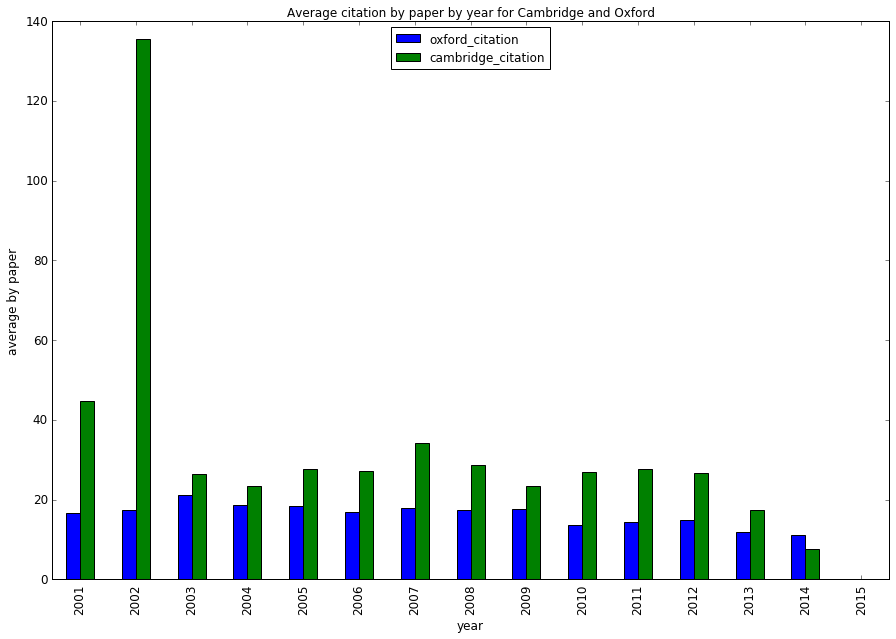

In [12]:
%matplotlib inline
ax = oxbridge_normalised[['oxford_citation','cambridge_citation']].plot(kind='bar', title ="Average citation by paper by year for Cambridge and Oxford",figsize=(15,10),legend=True, fontsize=12)
cnt = len(oxbridge_normalised)
x_axis = np.arange(cnt)
ax.set_xlabel("year",fontsize=12)
plt.xticks(x_axis,oxford_citation_mean_by_year['publish_year'] )
ax.set_ylabel("average by paper",fontsize=12)
plt.show()

#### This is just the start, our plan for the future is make this analysis avalaible to all the repository manger, here is a mockup of what the future look like

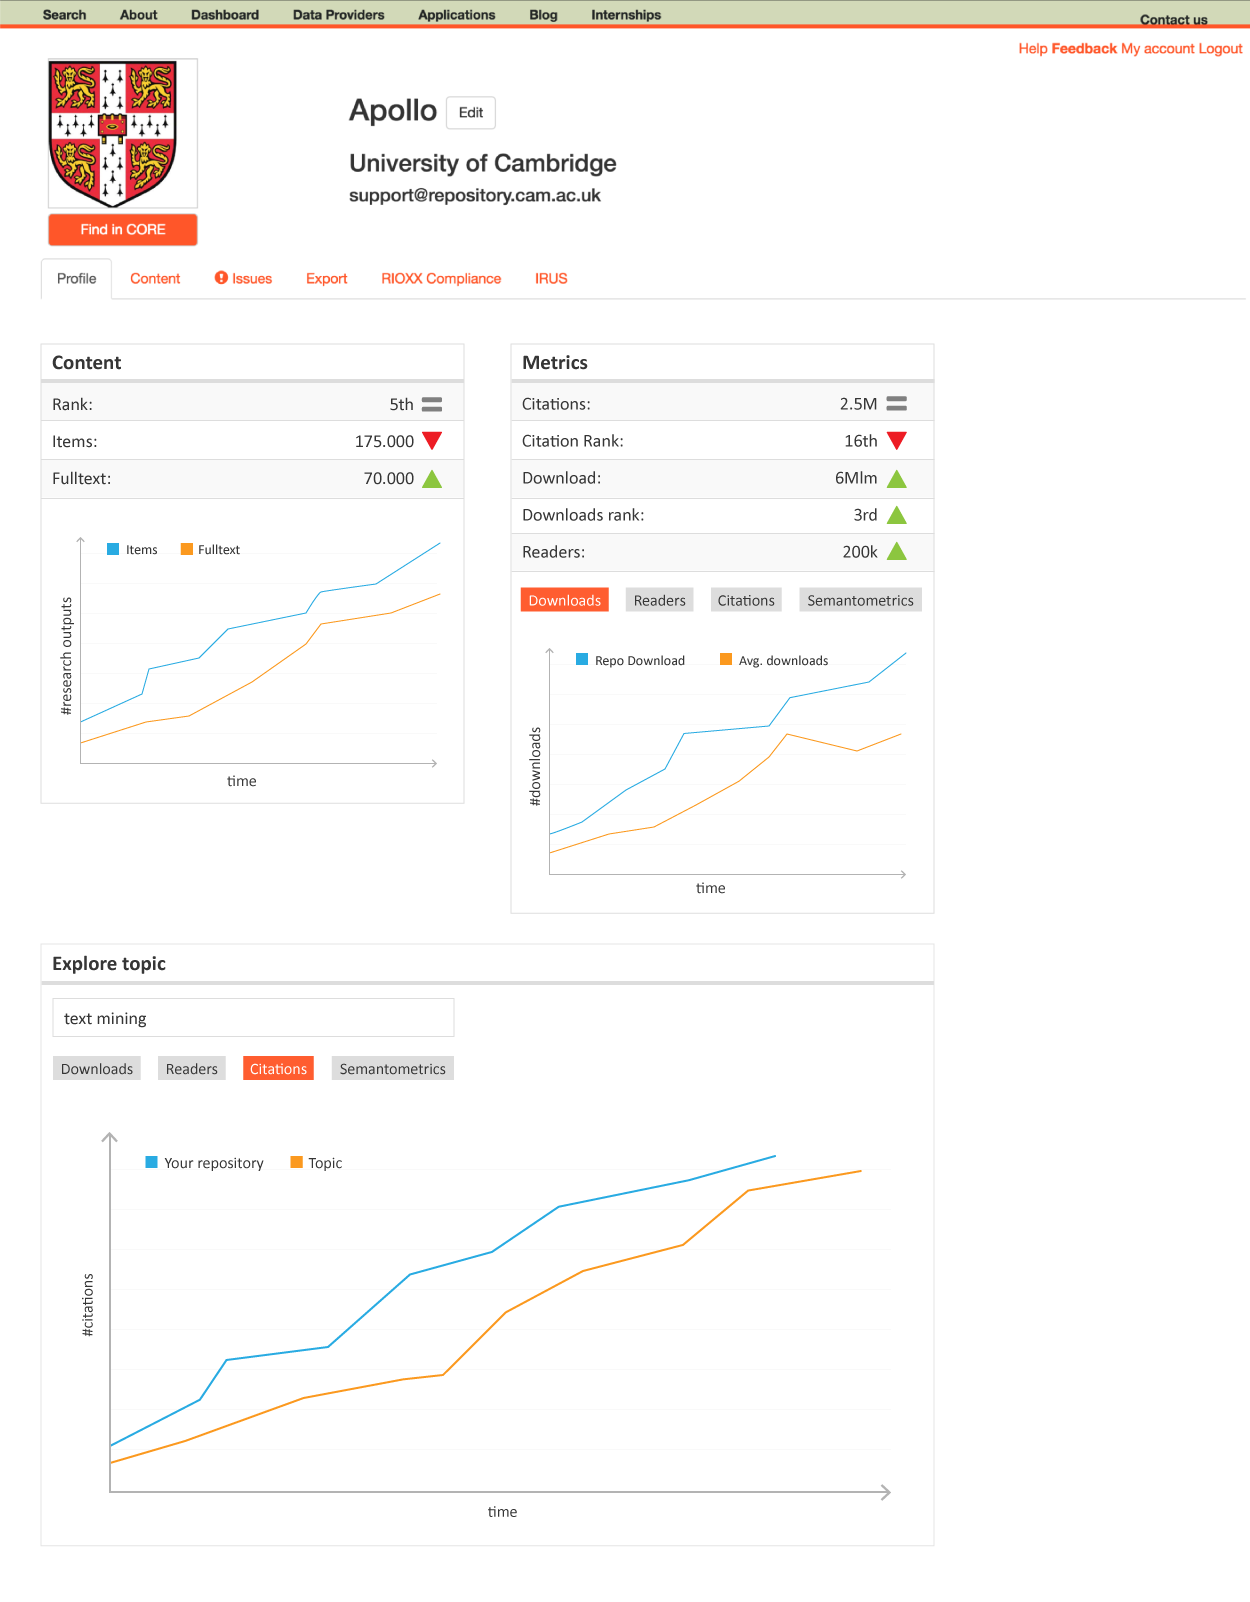

In [13]:
Image(filename='resources/dashboard-mockup.png')